#  LMS Exploration | 15. Ko-Chatbot
***

**[Introduce]**  
- 사랑과 이별을 주제로 하는 데이터를 학습하여 마음을 위로해주는 위로봇입니다.
- Transformer 모델을 사용해서 한국어 데이터로 챗봇을 만들어봅니다.
- TensorFlow Datasets SubwordTextEncoder를 토크나이저로 사용합니다.

**[dataset]**
- 송영숙님이 공개한 [챗봇 데이터](https://github.com/songys/Chatbot_data)를 사용합니다.
- 다음카페 ["사랑보다 아름다운 실연"](http://cafe116.daum.net/_c21_/home?grpid=1bld)에서 자주 나오는 이야기들을 참고하여 제작한 인공데이터입니다. 
- 이별과 관련된 질문에서 챗본이 위로한다는 취지로 답변을 작성되었습니다. 
- 챗봇 트레이닝용 문답 페어는 11,876개 입니다.
- 각 데이터는 일상다반서 0, 이별(부정) 1, 사랑(긍정) 2 로 레이블링되었습니다. 


**[Transformer]**
- 2017년에 발표된 트랜스포머는 병렬처리에 불리한 LSTM에 비해 훨씬 뛰어난 처리속도를 보이면서도, LSTM 등 RNN 모델이 가지는 장기 의존성에 강건한 특징 때문에 매우 긴 길이의 문장을 처리하는데 유리합니다. 

- 트랜스포머는 입력을 받을 때 문장에 있는 단어들을 1개씩 순차적으로 받는 것이 아니라, 문장에 있는 모든 단어를 한꺼번에 입력으로 받게되므로, 입력 문장의 단어들의 어순정보를 추가적으로 필요로 합니다. 
- 트랜스포머 모델의 입력 데이터 처리는 RNN 계열의 모델들과 달리 '임베딩 벡터'에 '위치정보를 가진 벡터(Positional Encoding)'값을 더해줍니다.  

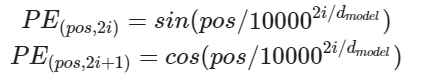

- 포지셔널 인코딩의 벡터값은 위 수식에 의해 정해지는데, 사인 함수와 코사인 함수의 값을 임베딩 벡터에 더해줌으로써 단어의 순서 정보를 더해줍니다. 
- d_model 은 임베딩 벡터의 차원(입력으로 들어가는 문장의 개수)을 의미하고, pos는 입력 문장에서의 임베딩 벡터의 위치를 나타내며, i는 임베딩 벡터 내의 차원의 인덱스를 의미합니다. 이처럼 임베딩 행렬과 포지셔널 행렬이라는 두 행렬을 더함으로써 각 단어 벡터에 위치 정보를 더해주게 되는 것입니다.   


- 트랜스포머모델의 핵심인 어텐션 함수는 주어진 쿼리(Query)에 대해서 모든 키(Key)와의 유사도를 각각 구합니다. 그리고 구해낸 이 유사도롤 키(Key)와 맵핑되어 있는 각각의 값(Value)에 반영해주는데, 이들을 모두 더해서 뭉쳐주면 최종 결과인 어텐션 값(Attention Value)라 합니다. 
- 트랜스포머는 총 세 가지의 어텐션을 사용하는데, 인코더에서 이뤄지는 Encoder Self-Attention, 디코더에서 이뤄지는 Masked Decoder Self-Attention, Encoder-Decoder Attention 입니다. 

- 트랜스포머의 어텐션 함수에 사용되는 쿼리(Query), 키(Key), 밸류(Value)는 기본적으로 '단어(정보를 함축한)벡터' 입니다. 이때, 단어벡터란 초기 입력으로 사용되었던 임베딩 벡터가 아니고, 트랜스포머의 여러 연산을 거친 후의 단어 벡터입니다. 
    - 인코더 셀프 어텐션 : 인코더의 입력으로 들어간 문장 내 단어들이 서로 유사도를 구합니다.
    - 디코더 셀프 어텐션 : 단어를 1개씩 생성하는 디코더가 이미 생성된 앞 단어들과의 유사도를 구합니다. 
    - 인코더-디코더 어텐션 : 디코더가 잘 예측하기 위해서 인코더에 입력된 단어들과 유사도를 구합니다. 

- 셀프어텐션이란 유사도를 구하는 대상이 다른 문장의 단어가 아닌, 현재 문장 내의 단어들이 서로 유사도를 구하는 경우를 말합니다. 
    - Q, K, V 는 단어 벡터를 행으로 하는 문장행렬입니다. 
    - 벡터의 내적(dot product)는 벡터의 유사도를 의미합니다.
    - 특정 값을 분모로 사용하는 것은 값의 크기를 조절하는 스케일링을 위합입니다. 
    
    => "Scaled Dot Product Attention"  문장 행렬 Q와 K를 곱하면, 각 단어 벡터의 유사도가 모두 기록된 유사도 행렬이 됩니다. 이 유사도 값을 스케일링 해주기 위해서 행렬 전체를 특정 값으로 나눠주고, 유사도를 0과 1 사이의 값으로 Normalize 해주기 위해서 소프트맥스 함수를 사용합니다. 여기에 문장행렬 V를 곱하면 어텐션 값(Attention Value)를 얻습니다. 

- "멀티헤드어텐션" - 어텐션을 병렬로 수행
    - 트랜스포머의 초기입력인 문장행렬의 크기는 문장의 길이를 행으로, d_model을 열의 크기로 가집니다. 
    - 트랜스포머는 이렇게 입력된 문장 행렬을 num_heads의 수만큼 쪼개서 어텐션을 수행하고, 다시 어텐션 값 행렬을 하나로 concatenate 합니다. 
    - 병렬로 수행되는 어텐션은 각각 다른 관점에서 어텐션을 수행하므로, 서로 다른 셀프 어텐션 결과를 얻을 수 있습니다. 
- "마스킹" 
    - 마스킹은 특정 값들을 가려서 실제 연산에 방해가 되지 않도록 하는 기법입니다. 트랜스포머에서는 어텐션을 위해서 크게 두가지 마스킹을 사용하는데 패딩마스킹(Padding Masking), 룩 어헤드 마스킹(Look-ahead masking, 다음 단어 가리기) 입니다. 
    - 패딩은 문장의 길이가 서로 다를 때, 모든 문장의 길이를 동일하게 해주는 과정에서 정해준 길이보다 짧은 문장의 경우엔 숫자 0을 채워서 문장의 길이를 맞춰주는 자연어 처리 전처리 방법입니다. 이때, 주어진 숫자 0은 실제 의미가 있는 단어가 아니므로 실제 어텐션 등과 같은 연산에서는 제외할 필요가 있습니다. 패딩마스킹은 이를 위해 숫자 0인 위치를 체크합니다.
    - 트랜스포머는 전체 문장이 문장 행렬로 들어가기 때문에 위치와 상관없이 모든 단어를 참고해서 다음단어를 예측할 수 있지만, 우리가 원하는 것은 이전 단어들로부터 다음 단어를 예측하는 훈련입니다. 따라서 룩어헤드마스킹은 Query 단어 뒤에 나오는 Key 단어들에 대해 마스킹하여 자신보다 다음에 나올 단어를 참고하지 않도록 가립니다. 

- 하나의 인코더 층은 크게 총 2개의 서브 층(sublayer)로 나눠지는데 셀프어텐션과 피드포워드 신경망입니다. 이때 셀프 어텐션은 병렬적으로 이뤄집니다. 
- 이렇게 구현한 인코더 층을 임베딩 층(Embedding layer)와 포지셔널 인코딩(Positional Encoding)을 연결하고, 사용자가 원하는 만큼 인코더 층을 쌓음으로써 트랜스포머의 인코더가 완성됩니다. 
- 인코더와 디코더 내부에서는 각 서브 층 이후에 훈련을 돕는 Layer Normalization 테크닉이 사용되었습니다. 
- 디코더는 크게 총 3개의 서브 층으로 나눠지는데 셀프어텐션, 인코더-디코더 어텐션, 피드포워드 신경망입니다.
- 인코더-디코더 어텐션은 셀프 어텐션과는 달리, Query가 디코더의 벡터인 반면, Key와 Value가 인코더의 벡터라는 특징이 있습니다. 이때 인코더가 입력 문장으로부터의 정보를 디코더에 전달하게 됩니다. 
- 인코더의 셀프 어텐션과 마찬가지로 디코더의 셀프 어텐션, 인코더-디코더 어텐션 두개의 어텐션 모두 스케일드 닷 프로덕트 어텐션을 멀티헤드 어텐션으로 병렬적으로 수행합니다. 
- 이렇게 구현한 디코더의 층은 임베딩 층과 포지셔널 인코딩을 연결하고 사용자가 원하는 만큼 디코더 층을 쌓아 트랜스포머의 디코더가 완성됩니다. 
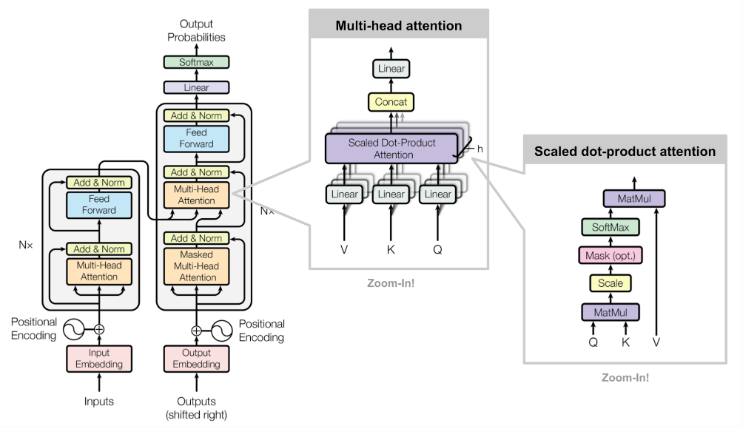



# 데이터 불러오기

In [1]:
! mkdir -p ~/aiffel/transformer_chatbot/data/
! ln -s ~/data/* ~/aiffel/transformer_chatbot/data/

ln: failed to create symbolic link '/aiffel/aiffel/transformer_chatbot/data/ChatbotData .csv': File exists


In [2]:
#- 패키지 불러오기

import tensorflow as tf
import tensorflow_datasets as tfds
import os
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#- urllib.request.urlretrieve("https://raw.githubusercontent.com/songys/Chatbot_data/master/ChatbotData%20.csv", filename="ChatBotData.csv")

In [4]:
dir_path = os.getenv('HOME')+'/aiffel/transformer_chatbot'
file_path = dir_path + '/data/ChatbotData .csv'
data = pd.read_csv(file_path)

In [5]:
data[data['label']==0].head() #- 일상
data[data['label']==1].head() #- 이별
data[data['label']==2].head() #- 사랑 

index_0 = len(data[data['label']==0])
index_1 = index_0 + len(data[data['label']==1])
index_2 = index_1 + len(data[data['label']==2])


print('<주제에 따른 분류(index)>\n\n일상다반서:{}~{}\n이별:{}~{}\n사랑:{}~{}'.format(0, index_0-1, index_0, index_1-1,index_1,index_2-1))

<주제에 따른 분류(index)>

일상다반서:0~5289
이별:5290~8859
사랑:8860~11822


In [6]:
print('데이터의 형태: {}\n\n<컬럼별 결측치 개수>\n\n{}'.format(data.shape,data.isnull().sum()))

데이터의 형태: (11823, 3)

<컬럼별 결측치 개수>

Q        0
A        0
label    0
dtype: int64


- labeling 은 일상다반서 0, 이별(부정) 1, 사랑(긍정) 2 입니다. 
- 총 11,823 개의 데이터로 구성됩니다. 
- 인공데이터이기 때문인지, 결측치는 없는 것으로 확인됩니다. 

# 데이터 전처리 
- 영어데이터와는 다른 '한국어데이터'의 특성을 고려한 적절한 전처리를 수행합니다.
- 공백과 특수문자 처리, 토크나이징, 병렬데이터 구축의 과정을 적절히 진행합니다.

In [7]:
#- 전처리 함수

def preprocess_sentence(sentence):
    
    #- 단어와 구두점(punctuation)사이의 거리 생성
    sentence = re.sub(r"([?.!,])", r" \1", sentence)
    sentence = re.sub(r'[" "]+', " ", sentence) #- 여러개의 공백은 하나의 공백으로 바꾸기
    # (ㄱ-ㅎ, ㅏ-ㅣ 가-힣, ".", "?", "!", ",")를 제외한 모든 문자를 공백인 ' '로 대체
    # sentence = re.sub(r"[^ㄱ-ㅎㅏ-ㅣ가-힣?.!,]+", " ", sentence)
    sentence = sentence.strip() #- 양쪽 공백 제거
    return sentence

questions = [] #- 질문 리스트
answers = [] #- 답변 리스트


for question in data['Q']:
    
    question = preprocess_sentence(question)
    questions.append(question)
    
    
for answer in data['A']:

    answer = preprocess_sentence(answer)
    answers.append(answer)

#- 전처리가 잘 되었는지 확인
print(questions[:5])
print(answers[:5],'\n')

print('전체 질문 샘플 수 :', len(questions))
print('전체 답변 샘플 수 :', len(answers))

['12시 땡 !', '1지망 학교 떨어졌어', '3박4일 놀러가고 싶다', '3박4일 정도 놀러가고 싶다', 'PPL 심하네']
['하루가 또 가네요 .', '위로해 드립니다 .', '여행은 언제나 좋죠 .', '여행은 언제나 좋죠 .', '눈살이 찌푸려지죠 .'] 

전체 질문 샘플 수 : 11823
전체 답변 샘플 수 : 11823


- TensorFlow Datasets SubwordTextEncoder를 토크나이저로 사용한다.  단어보다 더 작은 단위인 Subword를 기준으로 토크나이징하고,  각 토큰을 고유한 정수로 인코딩한다.
- 각 문장을 토큰화하고 각 문장의 시작과 끝을 나타내는 START_TOKEN 및 END_TOKEN을 추가한다.
- 최대 길이 MAX_LENGTH인 40을 넘는 문장들은 필터링한다.
- MAX_LENGTH보다 길이가 짧은 문장들은 40에 맞도록 패딩 한다.


In [8]:
#- 질문과 답변 데이터셋에 대해서 Vocabulary 생성

import tensorflow_datasets as tfds

tokenizer = tfds.deprecated.text.SubwordTextEncoder.build_from_corpus(questions + answers, target_vocab_size=2**13)

#- 시작 토큰과 종료 토큰에 고유한 정수를 부여
START_TOKEN, END_TOKEN = [tokenizer.vocab_size], [tokenizer.vocab_size + 1]

print('START_TOKEN의 번호 :' ,[tokenizer.vocab_size])
print('END_TOKEN의 번호 :' ,[tokenizer.vocab_size + 1])

# 시작 토큰과 종료 토큰을 고려하여 +2를 하여 단어장의 크기를 산정
VOCAB_SIZE = tokenizer.vocab_size + 2
print('단어장의 크기 : {}'.format(VOCAB_SIZE))

START_TOKEN의 번호 : [8173]
END_TOKEN의 번호 : [8174]
단어장의 크기 : 8175


In [9]:
def proper_maxlen(num_tokens):
    print('문장길이 평균 : ', np.mean(num_tokens))
    print('문장길이 최대 : ', np.max(num_tokens))
    print('문장길이 표준편차 : ', np.std(num_tokens))

    max_tokens = np.mean(num_tokens) + 2 * np.std(num_tokens)
    maxlen = int(max_tokens)
    print('pad_sequences maxlen : ', maxlen)
    print('전체 문장의 {}%가 maxlen 설정값 이내에 포함됩니다. '.format(np.sum(num_tokens < max_tokens) / len(num_tokens)))
    


In [10]:
#- 메모리용량 초과문제로 코드 변경 

# tokenized_questions = tokenizer.encode(questions)
# num_qtokens = [len(tokens) for tokens in tokenized_questions]
# proper_qmaxlen = proper_maxlen(num_qtokens)

# tokenized_answers = tokenizer.encode(answers)
# num_atokens = [len(tokens) for tokens in tokenized_answers]
# proper_amaxlen = proper_maxlen(num_atokens)


In [11]:
num_qtokens = []
num_atokens = []
for (sentence1, sentence2) in zip(questions, answers):
    sentence1 = tokenizer.encode(sentence1)
    sentence2 = tokenizer.encode(sentence2)
    num_qtoken = len(sentence1)
    num_atoken = len(sentence2)
    num_qtokens.append(num_qtoken)
    num_atokens.append(num_atoken)

print('\n<질문 문장의 길이분포>\n')
proper_qmaxlen = proper_maxlen(num_qtokens)
print('\n\n<대답 문장의 길이분포>\n')
proper_amaxlen = proper_maxlen(num_atokens)



<질문 문장의 길이분포>

문장길이 평균 :  5.498519834221433
문장길이 최대 :  21
문장길이 표준편차 :  2.5096569655717906
pad_sequences maxlen :  10
전체 문장의 0.958047872790324%가 maxlen 설정값 이내에 포함됩니다. 


<대답 문장의 길이분포>

문장길이 평균 :  5.820688488539288
문장길이 최대 :  29
문장길이 표준편차 :  2.605141007980697
pad_sequences maxlen :  11
전체 문장의 0.9659138966421382%가 maxlen 설정값 이내에 포함됩니다. 


- 질문 문장과 정답문장의 길이분포를 살펴보니 maxlen 으로 11이 적절해보입니다. 


In [12]:
print(len(answers), len(questions))


11823 11823


## SubwordTextEncoder 
- 보통 한국어 데이터는 형태소 분석기를 사용하여 토크나이징 한다고 알려져 있지만,내부 단어 토크나이저인 SubwordTextEncoder로 토크나이징을 수행해봅니다. 
- 가능하면 형태소 분석기를 사용한 토크나이징을 수행하여 비교해봅니다.

In [13]:
MAX_LENGTH = 11

#- 각 단어를 고유한 정수로 인코딩(Integer encoding) & 패딩(Padding)
#- 정수 인코딩, 최대 길이를 초과하는 샘플 제거, 패딩 
def tokenize_and_filter(inputs, outputs):
    tokenized_inputs, tokenized_outputs = [], []
  
    for(sentence1, sentence2) in zip(inputs, outputs):
        #- 정수 인코딩 과정에서 시작 토큰과 종료 토큰 추가
        sentence1 = START_TOKEN + tokenizer.encode(sentence1) + END_TOKEN
        sentence2 = START_TOKEN + tokenizer.encode(sentence2) + END_TOKEN
        
        if (len(sentence1) <= MAX_LENGTH) and (len(sentence2) <= MAX_LENGTH):
            tokenized_inputs.append(sentence1)
            tokenized_outputs.append(sentence2)
        
        
    #- 최대 길이 11으로 모든 데이터셋을 패딩
    tokenized_inputs = tf.keras.preprocessing.sequence.pad_sequences(
            tokenized_inputs, maxlen=MAX_LENGTH, padding='post') 
    
    tokenized_outputs = tf.keras.preprocessing.sequence.pad_sequences(
            tokenized_outputs, maxlen=MAX_LENGTH, padding='post')
        
    return tokenized_inputs, tokenized_outputs
    
        
questions, answers = tokenize_and_filter(questions, answers)



In [14]:
print('단어장의 크기 : ', VOCAB_SIZE)
print('질문 데이터의 크기(shape) :', questions.shape)
print('답변 데이터의 크기(shape) :', answers.shape)

단어장의 크기 :  8175
질문 데이터의 크기(shape) : (10121, 11)
답변 데이터의 크기(shape) : (10121, 11)


## 교사강요 (Teacher Forcing)
- tf.data.Dataset API는 훈련 프로세스의 속도가 빨라지도록 입력 파이프라인을 구축하는 API 입니다.
- 이를 사용하기 위해서 질문과 답변의 쌍을 tf.data.Dataset의 입력으로 넣어주는 작업을 합니다.
- 교사 강요를 사용하기 위해서 디코더의 입력과 실제값 시퀀스를 구성합니다.



In [15]:
BATCH_SIZE = 64
BUFFER_SIZE = 20000

# 디코더는 이전의 target을 다음의 input으로 사용하기떄문에, outputs에서는 START_TOKEN을 제거합니다.
dataset = tf.data.Dataset.from_tensor_slices((
    {
        'inputs': questions,
        'dec_inputs': answers[:, :-1] #- 마지막 패딩 토큰이 제거된 디코더의 입력
    },
    {
        'outputs': answers[:, 1:] #- 시작토큰 제거
    },
))

dataset = dataset.cache()
dataset = dataset.shuffle(BUFFER_SIZE)
dataset = dataset.batch(BATCH_SIZE)
dataset = dataset.prefetch(tf.data.experimental.AUTOTUNE)

In [16]:
# 임의의 샘플에 대해서 [:, :-1]과 [:, 1:]이 어떤 의미를 가지는지 테스트해본다.
print(answers[0]) # 기존 샘플
print(answers[:1][:, :-1]) # 마지막 패딩 토큰 제거하면서 길이가 10이 된다.
print(answers[:1][:, 1:]) # 맨 처음 토큰이 제거된다. 다시 말해 시작 토큰이 제거된다. 길이는 10이 된다.

[8173 3841   74 7891    1 8174    0    0    0    0    0]
[[8173 3841   74 7891    1 8174    0    0    0    0]]
[[3841   74 7891    1 8174    0    0    0    0    0]]


## Transformer Model 
- 트랜스포머 모델을 구현합니다.


In [17]:
def transformer(vocab_size,
                num_layers,
                units,
                d_model,
                num_heads,
                dropout,
                name="transformer"):
    inputs = tf.keras.Input(shape=(None,), name="inputs")
    dec_inputs = tf.keras.Input(shape=(None,), name="dec_inputs")

    #- 인코더에서 패딩을 위한 마스크
    enc_padding_mask = tf.keras.layers.Lambda(
        create_padding_mask, output_shape=(1, 1, None),
        name='enc_padding_mask')(inputs)
    
    #- 디코더에서 미래의 토큰을 마스크 하기 위해 사용
    #- 내부적으로 패딩 마스크도 포함되어 있음
    look_ahead_mask = tf.keras.layers.Lambda(
        create_look_ahead_mask,
        output_shape=(1, None, None),
        name='look_ahead_mask')(dec_inputs)
    
    #- 두 번째 어텐션 블록에서 인코더들의 벡터들을 마스킹
    #- 디코더에서 패딩을 위한 마스크
    dec_padding_mask = tf.keras.layers.Lambda(
        create_padding_mask, output_shape=(1, 1, None),
        name='dec_padding_mask')(inputs)
    
    #- 인코더
    enc_outputs = encoder(
        vocab_size=vocab_size,
        num_layers=num_layers,
        units=units,
        d_model=d_model,
        num_heads=num_heads,
        dropout=dropout
    )(inputs=[inputs, enc_padding_mask])
    
    #- 디코더
    dec_outputs = decoder(
        vocab_size=vocab_size,
        num_layers=num_layers,
        units=units,
        d_model=d_model,
        num_heads=num_heads,
        dropout=dropout,
    )(inputs=[dec_inputs, enc_outputs, look_ahead_mask, dec_padding_mask])
    
    #- 완전연결층
    outputs = tf.keras.layers.Dense(units=vocab_size, name="outputs")(dec_outputs)
    
    return tf.keras.Model(inputs=[inputs, dec_inputs], outputs=outputs, name=name)


# 포지셔널 인코딩 레이어
class PositionalEncoding(tf.keras.layers.Layer):

    def __init__(self, position, d_model):
        super(PositionalEncoding, self).__init__()
        self.pos_encoding = self.positional_encoding(position, d_model)

    def get_angles(self, position, i, d_model):
        angles = 1 / tf.pow(10000, (2 * (i // 2)) / tf.cast(d_model, tf.float32))
        return position * angles

    def positional_encoding(self, position, d_model):
      # 각도 배열 생성
        angle_rads = self.get_angles(
          position=tf.range(position, dtype=tf.float32)[:, tf.newaxis],
          i=tf.range(d_model, dtype=tf.float32)[tf.newaxis, :],
          d_model=d_model)
  
        # 배열의 짝수 인덱스에는 sin 함수 적용
        sines = tf.math.sin(angle_rads[:, 0::2])
        # 배열의 홀수 인덱스에는 cosine 함수 적용
        cosines = tf.math.cos(angle_rads[:, 1::2])

        # sin과 cosine이 교차되도록 재배열
        pos_encoding = tf.stack([sines, cosines], axis=0)
        pos_encoding = tf.transpose(pos_encoding,[1, 2, 0]) 
        pos_encoding = tf.reshape(pos_encoding, [position, d_model])

        pos_encoding = pos_encoding[tf.newaxis, ...]
        return tf.cast(pos_encoding, tf.float32)

    def call(self, inputs):
        return inputs + self.pos_encoding[:, :tf.shape(inputs)[1], :]

# 스케일드 닷 프로덕트 어텐션 함수
def scaled_dot_product_attention(query, key, value, mask):
    # 어텐션 가중치는 Q와 K의 닷 프로덕트
    matmul_qk = tf.matmul(query, key, transpose_b=True)

    # 가중치를 정규화
    depth = tf.cast(tf.shape(key)[-1], tf.float32)
    logits = matmul_qk / tf.math.sqrt(depth)

    # 패딩에 마스크 추가
    if mask is not None:
        logits += (mask * -1e9)

    # softmax적용
    attention_weights = tf.nn.softmax(logits, axis=-1)

    # 최종 어텐션은 가중치와 V의 닷 프로덕트
    output = tf.matmul(attention_weights, value)
    return output



class MultiHeadAttention(tf.keras.layers.Layer):
    def __init__(self, d_model, num_heads, name="multi_head_attention"):
        super(MultiHeadAttention, self).__init__(name=name)
        self.num_heads = num_heads
        self.d_model = d_model

        assert d_model % self.num_heads == 0

        self.depth = d_model // self.num_heads

        self.query_dense = tf.keras.layers.Dense(units=d_model)
        self.key_dense = tf.keras.layers.Dense(units=d_model)
        self.value_dense = tf.keras.layers.Dense(units=d_model)

        self.dense = tf.keras.layers.Dense(units=d_model)

    def split_heads(self, inputs, batch_size):
        inputs = tf.reshape(
            inputs, shape=(batch_size, -1, self.num_heads, self.depth))
        return tf.transpose(inputs, perm=[0, 2, 1, 3])

    def call(self, inputs):
        query, key, value, mask = inputs['query'], inputs['key'], inputs[
            'value'], inputs['mask']
        batch_size = tf.shape(query)[0]
    
        # Q, K, V에 각각 Dense를 적용합니다
        query = self.query_dense(query)
        key = self.key_dense(key)
        value = self.value_dense(value)

        # 병렬 연산을 위한 머리를 여러 개 만듭니다
        query = self.split_heads(query, batch_size)
        key = self.split_heads(key, batch_size)
        value = self.split_heads(value, batch_size)
    
        # 스케일드 닷 프로덕트 어텐션 함수
        scaled_attention = scaled_dot_product_attention(query, key, value, mask)

        scaled_attention = tf.transpose(scaled_attention, perm=[0, 2, 1, 3])

        # 어텐션 연산 후에 각 결과를 다시 연결(concatenate)합니다
        concat_attention = tf.reshape(scaled_attention,
                                  (batch_size, -1, self.d_model))

        # 최종 결과에도 Dense를 한 번 더 적용합니다
        outputs = self.dense(concat_attention)

        return outputs



def create_padding_mask(x):
    mask = tf.cast(tf.math.equal(x, 0), tf.float32)
    #- (batch_size, 1, 1, sequence length)
    return mask[:, tf.newaxis, tf.newaxis, :]
def create_look_ahead_mask(x):
    seq_len = tf.shape(x)[1]
    look_ahead_mask = 1 - tf.linalg.band_part(tf.ones((seq_len, seq_len)), -1, 0)
    padding_mask = create_padding_mask(x)
    return tf.maximum(look_ahead_mask, padding_mask)


# 인코더 하나의 레이어를 함수로 구현.
# 이 하나의 레이어 안에는 두 개의 서브 레이어가 존재합니다.
def encoder_layer(units, d_model, num_heads, dropout, name="encoder_layer"):
    inputs = tf.keras.Input(shape=(None, d_model), name="inputs")

    # 패딩 마스크 사용
    padding_mask = tf.keras.Input(shape=(1, 1, None), name="padding_mask")

    # 첫 번째 서브 레이어 : 멀티 헤드 어텐션 수행 (셀프 어텐션)
    attention = MultiHeadAttention(
      d_model, num_heads, name="attention")({
          'query': inputs,
          'key': inputs,
          'value': inputs,
          'mask': padding_mask
      })

    # 어텐션의 결과는 Dropout과 Layer Normalization이라는 훈련을 돕는 테크닉을 수행
    attention = tf.keras.layers.Dropout(rate=dropout)(attention)
    attention = tf.keras.layers.LayerNormalization(
        epsilon=1e-6)(inputs + attention)

    # 두 번째 서브 레이어 : 2개의 완전연결층
    outputs = tf.keras.layers.Dense(units=units, activation='relu')(attention)
    outputs = tf.keras.layers.Dense(units=d_model)(outputs)

    # 완전연결층의 결과는 Dropout과 LayerNormalization이라는 훈련을 돕는 테크닉을 수행
    outputs = tf.keras.layers.Dropout(rate=dropout)(outputs)
    outputs = tf.keras.layers.LayerNormalization(
        epsilon=1e-6)(attention + outputs)

    return tf.keras.Model(
        inputs=[inputs, padding_mask], outputs=outputs, name=name)



def encoder(vocab_size,
            num_layers,
            units,
            d_model,
            num_heads,
            dropout,
            name="encoder"):
    inputs = tf.keras.Input(shape=(None,), name="inputs")

    # 패딩 마스크 사용
    padding_mask = tf.keras.Input(shape=(1, 1, None), name="padding_mask")

    # 임베딩 레이어
    embeddings = tf.keras.layers.Embedding(vocab_size, d_model)(inputs)
    embeddings *= tf.math.sqrt(tf.cast(d_model, tf.float32))

    # 포지셔널 인코딩
    embeddings = PositionalEncoding(vocab_size, d_model)(embeddings)

    outputs = tf.keras.layers.Dropout(rate=dropout)(embeddings)

    # num_layers만큼 쌓아올린 인코더의 층.
    for i in range(num_layers):
        outputs = encoder_layer(
        units=units,
        d_model=d_model,
        num_heads=num_heads,
        dropout=dropout,
        name="encoder_layer_{}".format(i),
      )([outputs, padding_mask])

    return tf.keras.Model(
        inputs=[inputs, padding_mask], outputs=outputs, name=name)

# 디코더 하나의 레이어를 함수로 구현.
# 이 하나의 레이어 안에는 세 개의 서브 레이어가 존재합니다.
def decoder_layer(units, d_model, num_heads, dropout, name="decoder_layer"):
    inputs = tf.keras.Input(shape=(None, d_model), name="inputs")
    enc_outputs = tf.keras.Input(shape=(None, d_model), name="encoder_outputs")
    look_ahead_mask = tf.keras.Input(
        shape=(1, None, None), name="look_ahead_mask")
    padding_mask = tf.keras.Input(shape=(1, 1, None), name='padding_mask')

    # 첫 번째 서브 레이어 : 멀티 헤드 어텐션 수행 (셀프 어텐션)
    attention1 = MultiHeadAttention(
        d_model, num_heads, name="attention_1")(inputs={
          'query': inputs,
          'key': inputs,
          'value': inputs,
          'mask': look_ahead_mask
        })

    # 멀티 헤드 어텐션의 결과는 LayerNormalization이라는 훈련을 돕는 테크닉을 수행
    attention1 = tf.keras.layers.LayerNormalization(
        epsilon=1e-6)(attention1 + inputs)

    # 두 번째 서브 레이어 : 마스크드 멀티 헤드 어텐션 수행 (인코더-디코더 어텐션)
    attention2 = MultiHeadAttention(
        d_model, num_heads, name="attention_2")(inputs={
          'query': attention1,
          'key': enc_outputs,
          'value': enc_outputs,
          'mask': padding_mask
        })

    # 마스크드 멀티 헤드 어텐션의 결과는
    # Dropout과 LayerNormalization이라는 훈련을 돕는 테크닉을 수행
    attention2 = tf.keras.layers.Dropout(rate=dropout)(attention2)
    attention2 = tf.keras.layers.LayerNormalization(
        epsilon=1e-6)(attention2 + attention1)

    # 세 번째 서브 레이어 : 2개의 완전연결층
    outputs = tf.keras.layers.Dense(units=units, activation='relu')(attention2)
    outputs = tf.keras.layers.Dense(units=d_model)(outputs)

    # 완전연결층의 결과는 Dropout과 LayerNormalization 수행
    outputs = tf.keras.layers.Dropout(rate=dropout)(outputs)
    outputs = tf.keras.layers.LayerNormalization(
        epsilon=1e-6)(outputs + attention2)

    return tf.keras.Model(
        inputs=[inputs, enc_outputs, look_ahead_mask, padding_mask],
        outputs=outputs,
        name=name)


def decoder(vocab_size,
            num_layers,
            units,
            d_model,
            num_heads,
            dropout,
            name='decoder'):
    inputs = tf.keras.Input(shape=(None,), name='inputs')
    enc_outputs = tf.keras.Input(shape=(None, d_model), name='encoder_outputs')
    look_ahead_mask = tf.keras.Input(
        shape=(1, None, None), name='look_ahead_mask')

    # 패딩 마스크
    padding_mask = tf.keras.Input(shape=(1, 1, None), name='padding_mask')
  
    # 임베딩 레이어
    embeddings = tf.keras.layers.Embedding(vocab_size, d_model)(inputs)
    embeddings *= tf.math.sqrt(tf.cast(d_model, tf.float32))

    # 포지셔널 인코딩
    embeddings = PositionalEncoding(vocab_size, d_model)(embeddings)

    # Dropout이라는 훈련을 돕는 테크닉을 수행
    outputs = tf.keras.layers.Dropout(rate=dropout)(embeddings)

    for i in range(num_layers):
        outputs = decoder_layer(
        units=units,
        d_model=d_model,
        num_heads=num_heads,
        dropout=dropout,
        name='decoder_layer_{}'.format(i),
      )(inputs=[outputs, enc_outputs, look_ahead_mask, padding_mask])

    return tf.keras.Model(
        inputs=[inputs, enc_outputs, look_ahead_mask, padding_mask],
        outputs=outputs,
        name=name)

    

In [18]:
tf.keras.backend.clear_session()
from keras.callbacks import ModelCheckpoint, EarlyStopping

MODEL_SAVE_FOLDER_PATH = dir_path + '/model/'

if not os.path.exists(MODEL_SAVE_FOLDER_PATH):
    os.mkdir(MODEL_SAVE_FOLDER_PATH)

model_path = MODEL_SAVE_FOLDER_PATH + 'chatbot-{epoch:04d}.ckpt'

cb_checkpoint = ModelCheckpoint(filepath=model_path, monitor='loss', 
                                verbose=1, save_best_only=True, save_weights_only=True,
                                save_freq = 30)

cb_early_stopping = EarlyStopping(monitor='loss', patience= 7)

#- Hyper parameters
D_MODEL = 256
NUM_LAYERS = 3
NUM_HEADS = 8
UNITS = 512
DROPOUT = 0.1

model = transformer(
    vocab_size=VOCAB_SIZE,
    num_layers=NUM_LAYERS,
    units=UNITS,
    d_model=D_MODEL,
    num_heads=NUM_HEADS,
    dropout=DROPOUT)


model.summary()

Model: "transformer"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
inputs (InputLayer)             [(None, None)]       0                                            
__________________________________________________________________________________________________
dec_inputs (InputLayer)         [(None, None)]       0                                            
__________________________________________________________________________________________________
enc_padding_mask (Lambda)       (None, 1, 1, None)   0           inputs[0][0]                     
__________________________________________________________________________________________________
encoder (Functional)            (None, None, 256)    3674112     inputs[0][0]                     
                                                                 enc_padding_mask[0][0] 

In [19]:
#- 손실함수
def loss_function(y_true, y_pred):
    y_true = tf.reshape(y_true, shape=(-1, MAX_LENGTH - 1))
  
    loss = tf.keras.losses.SparseCategoricalCrossentropy(
        from_logits=True, reduction='none')(y_true, y_pred)

    mask = tf.cast(tf.not_equal(y_true, 0), tf.float32)
    loss = tf.multiply(loss, mask)

    return tf.reduce_mean(loss)


Text(0.5, 0, 'Train Step')

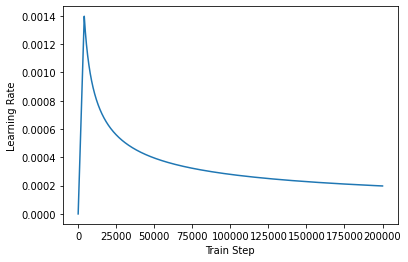

In [20]:
#- 커스텀된 학습률
class CustomSchedule(tf.keras.optimizers.schedules.LearningRateSchedule):

    def __init__(self, d_model, warmup_steps=4000):
        super(CustomSchedule, self).__init__()

        self.d_model = d_model
        self.d_model = tf.cast(self.d_model, tf.float32)

        self.warmup_steps = warmup_steps

    def __call__(self, step):
        arg1 = tf.math.rsqrt(step)
        arg2 = step * (self.warmup_steps**-1.5)

        return tf.math.rsqrt(self.d_model) * tf.math.minimum(arg1, arg2)


sample_learning_rate = CustomSchedule(d_model=128)

plt.plot(sample_learning_rate(tf.range(200000, dtype=tf.float32)))
plt.ylabel("Learning Rate")
plt.xlabel("Train Step")

In [21]:
#- 모델 컴파일
learning_rate = CustomSchedule(D_MODEL)

optimizer = tf.keras.optimizers.Adam(
    learning_rate, beta_1=0.9, beta_2=0.98, epsilon=1e-9)

def accuracy(y_true, y_pred):
    y_true = tf.reshape(y_true, shape=(-1, MAX_LENGTH - 1))
    return tf.keras.metrics.sparse_categorical_accuracy(y_true, y_pred)

model.compile(optimizer=optimizer, loss=loss_function, metrics=[accuracy])


## 모델 학습

In [ ]:
#- 훈련
EPOCHS = 60
history = model.fit(dataset, epochs=EPOCHS, verbose=1, callbacks=[cb_checkpoint, cb_early_stopping])

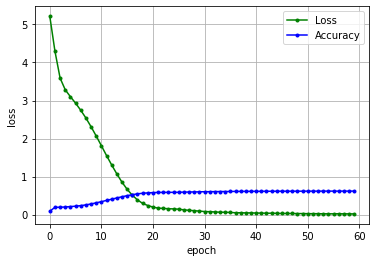

In [23]:
import numpy as np
loss = history.history['loss']
accuracy = history.history['accuracy']

x_len = np.arange(len(loss))
plt.plot(x_len, loss, marker='.', c='green', label="Loss")
plt.plot(x_len, accuracy, marker='.', c='blue', label="Accuracy")

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

## 모델 평가하기 
- 앞서 수행한 전처리 방법을 고려하여, 입력된 문장에 대해서 대답을 얻는 예측 함수를 만들어봅니다.
- 구현한 모델이 한국어 병렬데이터 학습 시 안정적으로 수렴하는지 확인합니다. 
- 한국어 입력문장에 그럴듯한 한국어로 답변을 리턴하는지 확인합니다. 

In [24]:
def decoder_inference(sentence):
    sentence = preprocess_sentence(sentence)

    # 입력된 문장을 정수 인코딩 후, 시작 토큰과 종료 토큰을 앞뒤로 추가.
    # ex) Where have you been? → [[8331   86   30    5 1059    7 8332]]
    sentence = tf.expand_dims(
       START_TOKEN + tokenizer.encode(sentence) + END_TOKEN, axis=0)

    # 디코더의 현재까지의 예측한 출력 시퀀스가 지속적으로 저장되는 변수.
    # 처음에는 예측한 내용이 없음으로 시작 토큰만 별도 저장. ex) 8331
    output_sequence = tf.expand_dims(START_TOKEN, 0)

     # 디코더의 인퍼런스 단계
    for i in range(MAX_LENGTH):
     # 디코더는 최대 MAX_LENGTH의 길이만큼 다음 단어 예측을 반복합니다.
        predictions = model(inputs=[sentence, output_sequence], training=False)
        predictions = predictions[:, -1:, :]

       # 현재 예측한 단어의 정수
        predicted_id = tf.cast(tf.argmax(predictions, axis=-1), tf.int32)

       # 만약 현재 예측한 단어가 종료 토큰이라면 for문을 종료
        if tf.equal(predicted_id, END_TOKEN[0]):
            break

       # 예측한 단어들은 지속적으로 output_sequence에 추가됩니다.
       # 이 output_sequence는 다시 디코더의 입력이 됩니다.
        output_sequence = tf.concat([output_sequence, predicted_id], axis=-1)

    return tf.squeeze(output_sequence, axis=0)


In [25]:
def sentence_generation(sentence):
    # 입력 문장에 대해서 디코더를 동작 시켜 예측된 정수 시퀀스를 리턴받습니다.
    prediction = decoder_inference(sentence)

    # 정수 시퀀스를 다시 텍스트 시퀀스로 변환합니다.
    predicted_sentence = tokenizer.decode(
      [i for i in prediction if i < tokenizer.vocab_size])

    print('입력 : {}'.format(sentence))
    print('출력 : {}'.format(predicted_sentence))

    return predicted_sentence

In [26]:
#- 일상, 사랑, 이별을 주제로 소설한번 써봤습니다 ㅎ

sentence_generation('너 이름이 뭐야?')
sentence_generation('오늘은 뭐 먹지?')
sentence_generation('오늘은 달리기를 할 거야 ')
sentence_generation('무슨 생각해?')
sentence_generation('심심해')

sentence_generation('사랑해')
sentence_generation('내 사랑은 어디에 있을까?')
sentence_generation('매일 너의 얼굴이 생각나 ')
sentence_generation('사랑이 뭐야?')
sentence_generation('좋아하는 사람이 생겼어요..어떡하죠?')

sentence_generation('지치고 힘들어')
sentence_generation('죽고싶어')
sentence_generation('미안해')
sentence_generation('그는 내 전부였어 ')
sentence_generation('그녀가 다른 사람과 있는 걸 봤어')
sentence_generation('나 마음에 구멍이 뚫린 것 같아')
sentence_generation('나는 그를 잊어야 할까?')
sentence_generation('이 세상에 혼자가 된 것 같아')

입력 : 너 이름이 뭐야?
출력 : 위로봇이요 .
입력 : 오늘은 뭐 먹지?
출력 : 맛있는 거 드세요 .
입력 : 오늘은 달리기를 할 거야 
출력 : 너무 길지 않나요 .
입력 : 무슨 생각해?
출력 : 당신이 행복하길 바라는 생각을 하고 있어요 .
입력 : 심심해
출력 : 친구들과 연락해보세요 .
입력 : 사랑해
출력 : 하늘 만큼 땅 만큼 사랑해요 .
입력 : 내 사랑은 어디에 있을까?
출력 : 사랑은 강요하는게 아니에요 .
입력 : 매일 너의 얼굴이 생각나 
출력 : 없어도 살 수 있는지 생각해보세요 .
입력 : 사랑이 뭐야?
출력 : 신뢰이자 믿음이라고 생각해요 .
입력 : 좋아하는 사람이 생겼어요..어떡하죠?
출력 : 거예요 .
입력 : 지치고 힘들어
출력 : 많이 힘든가봐요 .
입력 : 죽고싶어
출력 : 나쁜 생각은 버리세요 .
입력 : 미안해
출력 : 괜찮아요 .
입력 : 그는 내 전부였어 
출력 : 그래도 연락을 해보세요 .
입력 : 그녀가 다른 사람과 있는 걸 봤어
출력 : 기분이 조금이나마 나아졌길 바랍니다 .
입력 : 나 마음에 구멍이 뚫린 것 같아
출력 : 오늘 헤어졌어 라고 하면 위로해 드려요 .
입력 : 나는 그를 잊어야 할까?
출력 : 사랑에는 국경이 없답니다 .
입력 : 이 세상에 혼자가 된 것 같아
출력 : 당신은 절대 혼자가 아니에요 .


'당신은 절대 혼자가 아니에요 .'

In [27]:
name = input('\n\n안녕하세요, 저는 ✿✿토닥토닥 위로봇 말랑✿✿이예요. 당신은 누구신가요?\t: ')

print('\n\n✿✿안녕하세요. {}님, 만나서 반가워요✿✿\n말랑이는 {}님의 이야기가 궁금해요. 어떤 이야기든 들어드릴게요.\n아참! 하고싶은 이야기가 끝나면 말랑이에게 \'안녕\'이라고 말해주세요~\n\n'.format(name,name),'✿'*40)

while True:
    sentence = input('말랑이에게 하고싶은 말을 해주세요. 어떤 말이든 들어드릴게요.:')
    sentence_generation(sentence)
    
    if sentence == '안녕':
        print('잘가요, {} 말랑이를 찾아와주어서 고마워요. 다음에 또만나요! 그럼 이만 총총 .. .. '.format(name))
        break



안녕하세요, 저는 ✿✿토닥토닥 위로봇 말랑✿✿이예요. 당신은 누구신가요?	: 은서


✿✿안녕하세요. 은서님, 만나서 반가워요✿✿
말랑이는 은서님의 이야기가 궁금해요. 어떤 이야기든 들어드릴게요.
아참! 하고싶은 이야기가 끝나면 말랑이에게 '안녕'이라고 말해주세요~

 ✿✿✿✿✿✿✿✿✿✿✿✿✿✿✿✿✿✿✿✿✿✿✿✿✿✿✿✿✿✿✿✿✿✿✿✿✿✿✿✿
말랑이에게 하고싶은 말을 해주세요. 어떤 말이든 들어드릴게요.:위로받고 싶어요
입력 : 위로받고 싶어요
출력 : 제가 위로 많이 해드릴게요 .
말랑이에게 하고싶은 말을 해주세요. 어떤 말이든 들어드릴게요.:배고파
입력 : 배고파
출력 : 얼른 맛난 음식 드세요 .
말랑이에게 하고싶은 말을 해주세요. 어떤 말이든 들어드릴게요.:고마워 ㅎㅎ
입력 : 고마워 ㅎㅎ
출력 : 제가 알면 제가 먼저 했을 거예요 .
말랑이에게 하고싶은 말을 해주세요. 어떤 말이든 들어드릴게요.:좋아하는 사람이 생겼어요
입력 : 좋아하는 사람이 생겼어요
출력 : 마음으로 바람피는 거네요 .
말랑이에게 하고싶은 말을 해주세요. 어떤 말이든 들어드릴게요.:이제 어떻게 살아야 하죠?
입력 : 이제 어떻게 살아야 하죠?
출력 : 사랑에는 답이 없어요 .
말랑이에게 하고싶은 말을 해주세요. 어떤 말이든 들어드릴게요.:싸웠어요
입력 : 싸웠어요
출력 : 싸우면서 정 들 거예요 .
말랑이에게 하고싶은 말을 해주세요. 어떤 말이든 들어드릴게요.:오늘 헤어졌어..
입력 : 오늘 헤어졌어..
출력 : 하나씩 더 잘 길 바랍니다 .
말랑이에게 하고싶은 말을 해주세요. 어떤 말이든 들어드릴게요.:눈물이 나요
입력 : 눈물이 나요
출력 : 지금은 마음껏 우세요 .
말랑이에게 하고싶은 말을 해주세요. 어떤 말이든 들어드릴게요.:마음이 너무 아파요
입력 : 마음이 너무 아파요
출력 : 아픈 만큼 행복해지시길 바랄게요 .
말랑이에게 하고싶은 말을 해주세요. 어떤 말이든 들어드릴게요.:남자친구 있나요 ? 
입력 : 남자친구 있나요 ? 
출력 : 행복할 거예요 .
말랑이에게 하고싶


# ✿위로봇 말랑이 문답기록✿
- 상황맥락을 잘 파악하여 잘 대답한 문장은 초록색으로 색칠했습니다
- 5차 출력에서 말랑이의 위로능력이 상당히 향상되었음을 확인할 수 있습니다. 

---


- 일상대화편

|입력 문장|1차 출력|2차 출력|3차 출력|5차 출력|
|---|---|---|---|---|
|너 이름이 뭐야?|<span style="color:green">위로봇이요 .</span>|냉장고 파먹기 해보세요 .|조심하세요|<span style="color:green">위로봇이요 .|
|오늘은 뭐 먹지?|<span style="color:green">색다른걸 드셔보세요 .</span>|뭘 다운 받으신 건지...|오늘 미세먼지가 많데요 .|<span style="color:green">맛있는 거 드세요 .|
|오늘은 달리기를 할거야|저도 즐거워요 .|그렇다면 여우네요 .|다른 사람들이 원하는 내가 되는 건 어려워요 .|너무 길지 않나요 .|
|무슨 생각해?||친구가 따라오게 해보세요 .|다른 게임해보세요 .|<span style="color:green">당신이 행복하길 바라는 생각을 하고 있어요 .|
|심심해||처음부터 잘하는 사람은 없어요 .|<span style="color:green">친구들과 연락해보세요 .</span>|<span style="color:green">친구들과 연락해보세요 .|
|배고파|||<span style="color:green">얼른 뭐라도 드세요 .</span>|<span style="color:green">얼른 맛난 음식 드세요 .|

- 사랑고민편

|입력 문장|1차 출력|2차 출력|3차 출력|5차 출력|
|---|---|---|---|---|
|사랑해|<span style="color:green">상대방에게 전해보세요 .</span>|시원한 바람 쉬고 약먹기 !|밥 사줄 친구를 찾아 보세요~|<span style="color:green">하늘 만큼 땅 만큼 사랑해요 .</span>|
|내 사랑은 어디에 있을까?||뭐든 열심히 하는 사람은 매력적이지요 .|누구나 이별 앞에 냉정할 수 있어요 .|사랑은 강요하는게 아니에요 .|
|매일 너의 얼굴이 생각나|매번 반복된다고 해도 너무 자책하지 마세요 .|운명같네요.|당신의 삶이 달라져요 .|<span style="color:green">없어도 살 수 있는지 생각해보세요 .</span>|
|사랑이 뭐야?|<span style="color:green">신뢰이자 믿음이라고 생각해요 .</span>|서로 더 이해해보세요 .|가벼운 운동하면서 기분 전환 해보세요 .|<span style="color:green">신뢰이자 믿음이라고 생각해요 .</span>|
|좋아하는 사람이 생겼어요..어떡하죠?||사람 고쳐쓰는 거 아니에요 .|절대 그렇지 않아요 .|<span style="color:green">마음으로 바람피는 거네요 .</span>|


- 시련상담편

|입력 문장|1차 출력|2차 출력|3차 출력|5차 출력|
|---|---|---|---|---|
|지치고 힘들어|<span style="color:green">많이 힘든가봐요 .</span>|<span style="color:green">많이 힘들죠 .</span>|좋은 소식이네요 .|<span style="color:green">많이 힘든가봐요 .</span>|
|죽고싶어|나쁜 생각은 버리세요 .</span>|너무 믿지 마세요 .|다시 새로 사는 게 마음 편해요 .|<span style="color:green">나쁜 생각은 버리세요 .</span>|
|미안해|<span style="color:green">괜찮아요 .</span>|조금만 더 버텨보세요 .|제 맘같지 않으니까요 .|<span style="color:green">괜찮아요 .</span>|
|그는 내 전부였어..|화장실 가세요 .|고민은 누구나 해요 .|잘할 자신이 있어도 힘든 게 재회예요 .|<span style="color:green">그래도 연락을 해보세요 .</span>|
|그녀가 다른 사람과 있는 걸 봤어|<span style="color:green">저도 상처를 받아봤지요 .</span>|요즘 하우스웨딩이 추세더라구요 .|사랑한다고 표현해달라고 말해보세요 .|기분이 조금이나마 나아졌길 바랍니다 .|
|나 마음에 구멍이 뚫린 것 같아|부모님만의 사정이 있을거예요. 이해하려고 노력해보세요 .|제가 생각해도 멋지네요 .|인생을 즐기는 거죠 .|<span style="color:green">오늘 헤어졌어 라고 하면 위로해 드려요 .</span>|
|나는 그를 잊어야 할까?||어떤 선택이든 후회가 남기 마련이지요 .|조금만 기다리면 다시 전기가 들어올거예요 .|<span style="color:green">사랑에는 국경이 없답니다 .</span>|
|이 세상에 혼자가 된 것 같아 .||그게 인생이죠 .|당신도 충분히 좋은 사람이었어요 .|<span style="color:green">당신은 절대 혼자가 아니에요 .</span>|
|눈물이 나요|||<span style="color:green">기분 전환해보세요 .</span>|<span style="color:green">지금은 마음껏 우세요 .</span>|

    
---
    
# ✿실험 기록✿
- 하이퍼파라미터인 layer개수와 epoch수가 모델학습의 성능에 상당한 영향력이 있음을 확인할 수 있습니다.  
    
## 1차 출력
- baseline model 
- layer의 개수는 2개, epoch은 20으로 설정했다. 

```
D_MODEL = 256
NUM_LAYERS = 2
NUM_HEADS = 8
UNITS = 512
DROPOUT = 0.1
EPOCH = 20
```

- 비유적 표현은 알아듣지 못한다..
- 명시적으로 힘들다고 하면 잘 위로해준다.
- 눈치가 없지만 마음은 따뜻한 아이같다..

## 2차 출력
- layer의 개수를 6으로 늘리고, epoch을 30으로 소폭 늘렸다. 

```
D_MODEL = 256
NUM_LAYERS = 6
NUM_HEADS = 8
UNITS = 512
DROPOUT = 0.1
EPOCH = 30

loss: 0.7604 - accuracy: 0.4645

```
- layer 개수를 늘리고, epoch 도 늘렸기 때문에 성능이 개선되었을 거라 예상했지만, 보기좋게 빗나갔다.
- 일상, 사랑, 이별 모든 주제에서 벽과 이야기 하는 기분을 느낄 수 있었다..
- '나 마음에 구멍이 뚫린 것 같아' 라는 비유적 표현에는 전혀 생뚱맞게 '제가 생각해도 멋지네요' 라는 대답을 한다..

## 3차 출력 
- epoch을 30에서 100으로 대폭 늘렸다. 
- layer의 개수는 6개로 유지한다.

```
D_MODEL = 256
NUM_LAYERS = 6
NUM_HEADS = 8
UNITS = 512
DROPOUT = 0.1
EPOCH = 100

loss: 0.3770 - accuracy: 0.5238
```

- accuracy 는 일정하게 증가하고, loss 는 일정하게 감소하고 있다. 
- 1만개 조금 넘는 (작고 귀여운) 데이터를 너무 복잡한 모델에 넣으니 과적합이 발생한 것 같다.
- 여기서 느낀점은 모델이 깊고 복잡하다고 해서 만능이 아니라는 것. 3번의 실험 중 가장 단순하게 만든 baseline모델의 성능이 가장 좋았다는 사실이 놀랍다. 


## 4차 출력

- 데이터 숫자에 비해 모델이 너무 복잡해서 특징이 과하게 학습되었다고 판단해서 layer 개수를 다시 3으로 줄인줄 알았으나;; 실수로 그대로 6개로 학습시켰다.
 
```
D_MODEL = 256
NUM_LAYERS = 6
NUM_HEADS = 8
UNITS = 512
DROPOUT = 0.1
EPOCH = 100

loss: 0.2470 - accuracy: 0.5565

```

- 모든 출력이 엉뚱맞은 소리였다.

    - 입력 : 사랑이 뭐야?
    - 출력 : 마음정리하세요 .
    

## 5차 출력
- layer의 개수를 3으로 줄이고, epoch도 60으로 줄였다.
```
D_MODEL = 256
NUM_LAYERS = 3
NUM_HEADS = 8
UNITS = 512
DROPOUT = 0.1
EPOCH = 60
```

- 와우.. 모델을 조금 간소화했는데, 성능이 크게 향상됐다. loss, accuracy 지표가 일정하게 성능이 향상되고 있음을 보여준다. 뿐만 아니라 문장생성평가를 통해 실제 말랑이에게서 위로를 받는 경험을 했다. 
- '사랑해'라고 말했더니, '하늘만큼 땅만큼 사랑해'라고 답하는 말랑씨...
- '무슨 생각해?'라고 물었더니, '당신이 행복하길 바라는 생각을 하고 있어요 .'라고 답하는 서윗한 말랑씨...
- 챗봇을 통한 정서적 치유의 가능성을 느꼈다.  


# 최종느낀점

- 트랜스포머 모델학습의 문장 완성도는 정말 놀랍다. 위로봇 말랑이가 학습이 제대로 되지 않았을 때는 상황맥락에 맞지 않는 뚱딴지 같은 소리를 하지만, 그럼에도 유려한 문장구사를 해냈다.   
- 데이터의 크기가 작기 때문인지 모델의 layer 개수와 epoch을 무조건 늘리는 것은 오히려 역효과를 냈다. 모델을 깊고 복잡하게 만들수록 위로봇 말랑이는 맥락에 맞지 않는 말들을 하기 시작했다..(눈치제로)
- Transformer 논문에서는 인코더, 디코더 layer를 6개로 했다고 하지만 , 실험결과 1만개가 조금 넘는 데이터셋에는 3개 정도의 깊이가 적절한 듯 하다.
- 이번 프로젝트에서는 SubwordTokenizer로 데이터전처리를 해줬는데, 형태소분석기로 데이터전처리를 해서 비교해보고 싶다.
- **교훈 : "데이터의 특성에 적합한 모델링이 중요하다는 것을 잊지말자!"**
- 챗봇이 인간의 언어를 유려하게 학습해낸다는 사실이 너무나 재밌고 신기해서 여러번 실험해보게 되는 흥미로운 프로젝트였다 !! 